## Import the required libraries

---



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from datetime import datetime
import calendar

##Data Loading

---



In [ ]:
#Load data in  dataframe
train_df =  pd.read_csv('/content/drive/MyDrive/CS_235-Group16-Final_Project/NYCTaxiFare_TrainData.csv', nrows = 10000, parse_dates=["pickup_datetime"])
# list first few rows (datapoints)
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


Check datatypes

In [ ]:
train_df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

Training data description

In [ ]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Fare Amount')

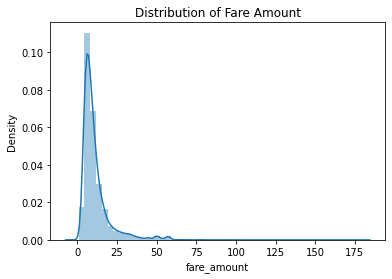

In [ ]:
sns.distplot(train_df['fare_amount'])
plt.title('Distribution of Fare Amount')

##Data Preprocessing

---



###Removal all the taxi trips that has negative fare amount.

In [ ]:
#Remove data which has the fare amount negative.
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.fare_amount>=0]
print('New size: %d' % len(train_df))

Old size: 10000
New size: 9998


###Removal taxi trips with missing data.

In [ ]:
#count of missing data with respect to attributes:
print(train_df.isnull().sum())

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
#Removing the records with missing data.
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 9998
New size: 9998


###Removal of taxi trips with passenger count less than zero and greater than six.

In [ ]:
print('Old size: %d' % len(train_df))
train_df = train_df[train_df.passenger_count<=6]
train_df = train_df[train_df.passenger_count>0]
print('New size: %d' % len(train_df))


Old size: 9998
New size: 9960


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


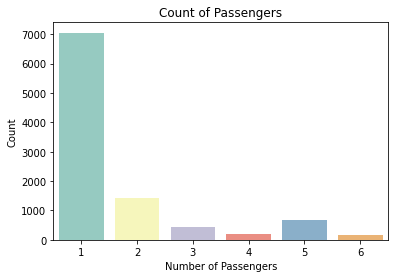

In [ ]:
passenger = train_df.groupby(['passenger_count']).count()
sns.barplot(passenger.index, passenger['key'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Count')
plt.title('Count of Passengers')
plt.show()

In [ ]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [ ]:
def groupandplot(data,groupby_key,value,aggregate='mean'):
    agg_data=data.groupby([groupby_key])[value].agg(aggregate).reset_index().rename(columns={value:aggregate+'_'+value})
    sns.barplot(x=groupby_key,y=aggregate+'_'+value,data=agg_data).set_title(aggregate+'_'+value+" vs "+groupby_key)

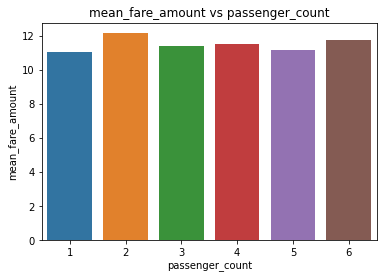

In [ ]:
groupandplot(train_df,'passenger_count','fare_amount')

###Removal of taxi trips having zero feature value.

In [ ]:
print('Old size: %d' % len(train_df))
train_df = train_df.loc[~(train_df == 0).any(axis=1)]
print('New size: %d' % len(train_df))

Old size: 9960
New size: 9764


###Converting the pickup_datetime attribute of type Object to different primitive types using lambda functions.

In [ ]:
train_df['pickup_datetime']=pd.to_datetime(train_df['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')

train_df['pickup_date']= train_df['pickup_datetime'].dt.date
train_df['pickup_day']=train_df['pickup_datetime'].apply(lambda x:x.day)
train_df['pickup_hour']=train_df['pickup_datetime'].apply(lambda x:x.hour)
train_df['pickup_day_of_week']=train_df['pickup_datetime'].apply(lambda x:calendar.day_name[x.weekday()])
train_df['pickup_month']=train_df['pickup_datetime'].apply(lambda x:x.month)
train_df['pickup_year']=train_df['pickup_datetime'].apply(lambda x:x.year)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

###Statistical Visualizations using Matplotlib

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Week')

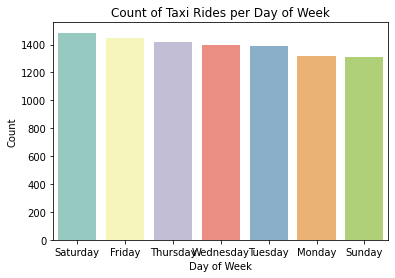

In [ ]:
day_count = train_df.groupby(['pickup_day_of_week']).count().sort_values(by = 'key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Taxi Rides per Day of Month')

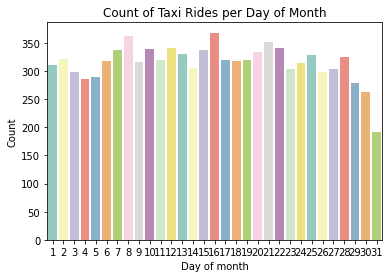

In [ ]:
day_count = train_df.groupby(['pickup_day']).count().sort_values(by = 'key', ascending = False)
sns.barplot(day_count.index, day_count['key'], palette = "Set3")
plt.xlabel('Day of month')
plt.ylabel('Count')
plt.title('Count of Taxi Rides per Day of Month')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Average Fare Amount per Day of Week')

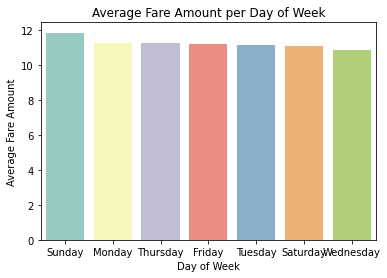

In [ ]:
day_fare = train_df.groupby(['pickup_day_of_week']).mean().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_fare.index, day_fare.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount per Day of Week')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of Total Rides Given During Each Day')

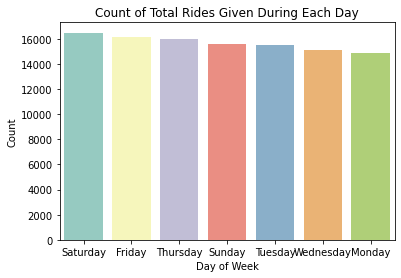

In [ ]:
day_sum = train_df.groupby(['pickup_day_of_week']).sum().sort_values(by = 'fare_amount', ascending = False)

sns.barplot(day_sum.index, day_sum.fare_amount, palette = "Set3")

plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Count of Total Rides Given During Each Day')

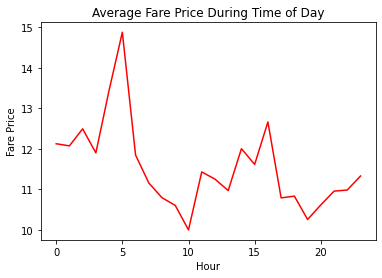

In [ ]:
time_of_day = train_df.groupby(['pickup_hour']).mean()
plt.plot(time_of_day.index, time_of_day.fare_amount, color = 'r')
plt.xlabel('Hour')
plt.ylabel('Fare Price')
plt.title('Average Fare Price During Time of Day')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


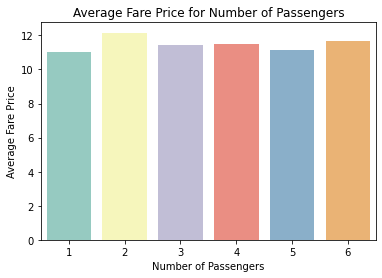

In [ ]:
passenger_fare = train_df.groupby(['passenger_count']).mean()
sns.barplot(passenger_fare.index, passenger_fare['fare_amount'], palette = "Set3")
plt.xlabel('Number of Passengers')
plt.ylabel('Average Fare Price')
plt.title('Average Fare Price for Number of Passengers')
plt.show()

In [ ]:
# Let us encode day of the week to numbers
def encodeDays(day_of_week):
    day_dict={'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
    return day_dict[day_of_week]

In [ ]:
train_df['pickup_day_of_week']=train_df['pickup_day_of_week'].apply(lambda x:encodeDays(x))

In [ ]:
train_df.dtypes

key                                object
fare_amount                       float64
pickup_datetime       datetime64[ns, UTC]
pickup_longitude                  float64
pickup_latitude                   float64
dropoff_longitude                 float64
dropoff_latitude                  float64
passenger_count                     int64
pickup_date                        object
pickup_day                          int64
pickup_hour                         int64
pickup_day_of_week                  int64
pickup_month                        int64
pickup_year                         int64
dtype: object

In [ ]:
train_df = train_df.drop(['key','pickup_datetime','pickup_date'], axis=1)
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


##Location data

In [ ]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])            


In [ ]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010


In [ ]:
def distance(lat1, lat2, lon1,lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
train_df['trip_distance']=train_df.apply(lambda row:distance(row['pickup_latitude'],row['dropoff_latitude']
                                                             ,row['pickup_longitude'],row['dropoff_longitude']),axis=1)

Text(0.5, 1.0, 'Distribution of Trip Distance (log scale)')

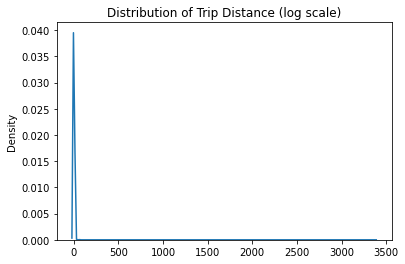

In [ ]:
sns.kdeplot(train_df['trip_distance'].values).set_title("Distribution of Trip Distance (log scale)")

Text(12.456249999999997, 0.5, 'Taxi Fare')

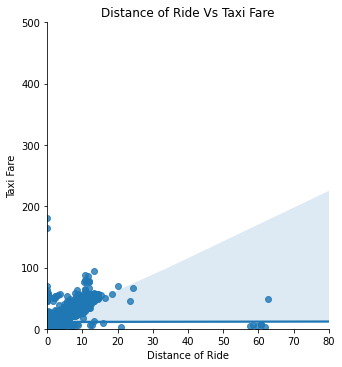

In [ ]:
a_plot=sns.lmplot(x='trip_distance', y='fare_amount',data=train_df)
a_plot.set(xlim=(0, 80))
a_plot.set(ylim=(0, 500))

plt.title('Distance of Ride Vs Taxi Fare')
# Set x-axis label
plt.xlabel('Distance of Ride')
# Set y-axis label
plt.ylabel('Taxi Fare')

In [ ]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218


In [ ]:
long_trips=train_df[train_df['trip_distance']>=50]

In [ ]:
nyc_boroughs={
    'manhattan':{
        'min_lng':-74.0479,
        'min_lat':40.6829,
        'max_lng':-73.9067,
        'max_lat':40.8820
    },
    
    'queens':{
        'min_lng':-73.9630,
        'min_lat':40.5431,
        'max_lng':-73.7004,
        'max_lat':40.8007

    },

    'brooklyn':{
        'min_lng':-74.0421,
        'min_lat':40.5707,
        'max_lng':-73.8334,
        'max_lat':40.7395

    },

    'bronx':{
        'min_lng':-73.9339,
        'min_lat':40.7855,
        'max_lng':-73.7654,
        'max_lat':40.9176

    },

    'staten_island':{
        'min_lng':-74.2558,
        'min_lat':40.4960,
        'max_lng':-74.0522,
        'max_lat':40.6490
        
    }  
}

In [ ]:
def getBorough(lat,lng):
    
    locs=nyc_boroughs.keys()
    for loc in locs:
        if lat>=nyc_boroughs[loc]['min_lat'] and lat<=nyc_boroughs[loc]['max_lat'] and lng>=nyc_boroughs[loc]['min_lng'] and lng<=nyc_boroughs[loc]['max_lng']:
            return loc
    return 'others'

In [ ]:
train_df['pickup_borough']=train_df.apply(lambda row:getBorough(row['pickup_latitude'],row['pickup_longitude']),axis=1)
train_df['dropoff_borough']=train_df.apply(lambda row:getBorough(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

Text(0.5, 1.0, 'Distribution of Pickup Boroughs')

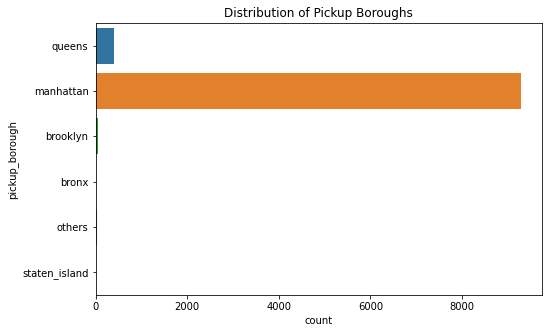

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(y=train_df['pickup_borough'])
plt.title("Distribution of Pickup Boroughs")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


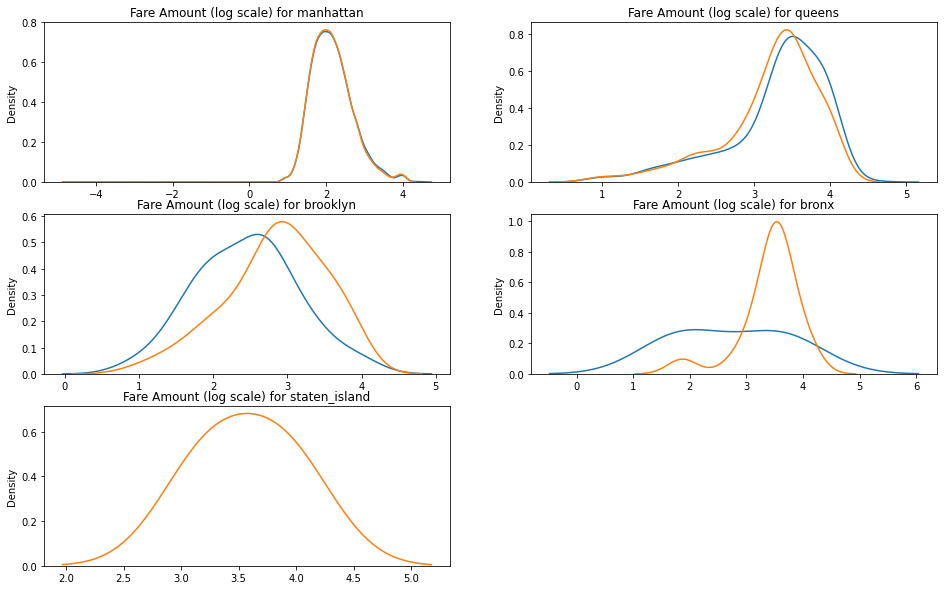

In [ ]:
plt.figure(figsize=(16,10))
plt.title("Distribution of Fare Amount Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(np.log(train_df.loc[train_df['pickup_borough']==key,'fare_amount'].values),label='Pickup '+ key)
    sns.kdeplot(np.log(train_df.loc[train_df['dropoff_borough']==key,'fare_amount'].values),label='Dropoff'+ key).set_title("Fare Amount (log scale) for "+key)
    i=i+1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


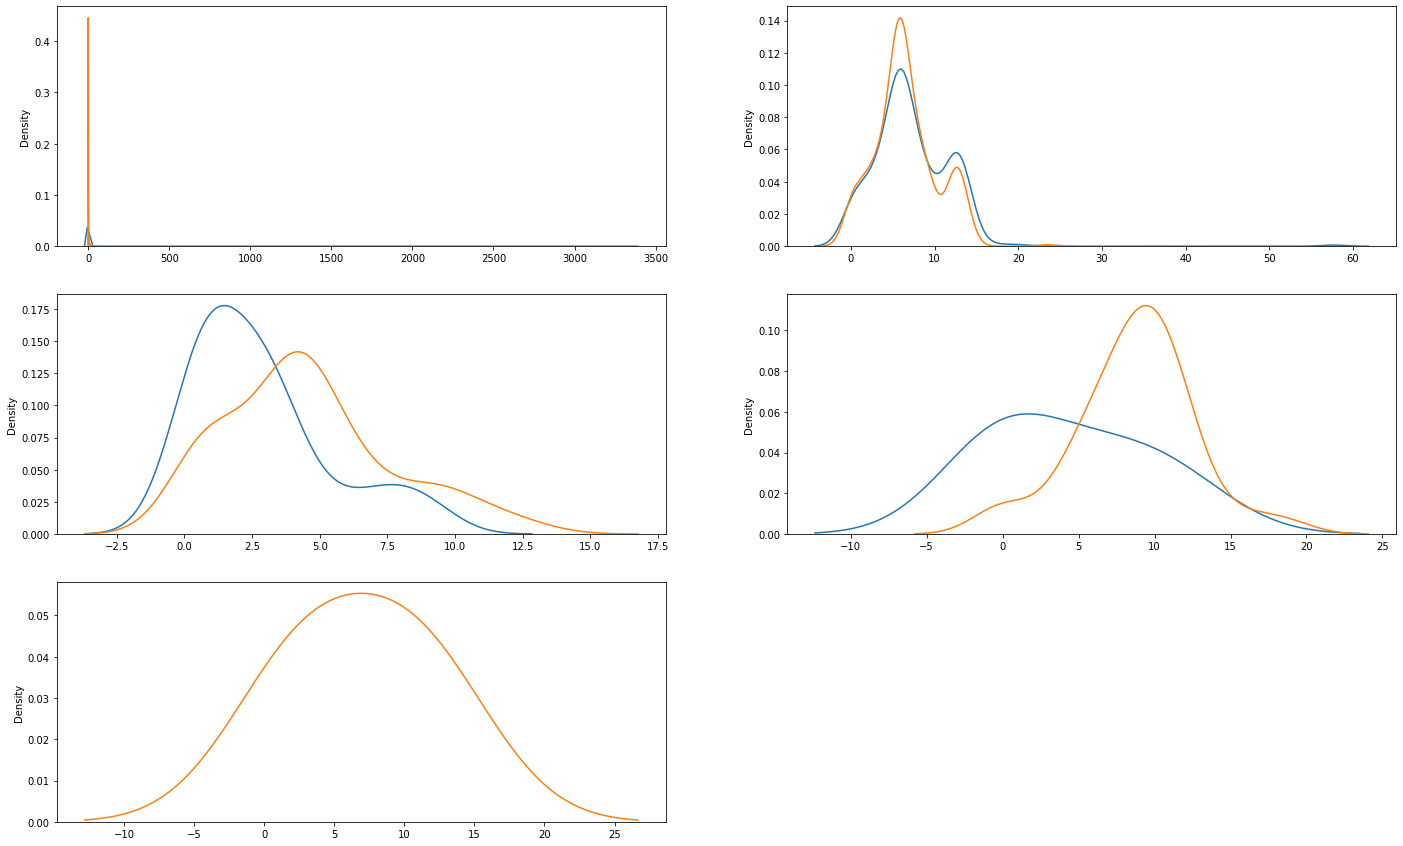

In [ ]:
plt.figure(figsize=(24,15))
plt.title("Distribution of Trip Distances Across Buroughs")
i=1
for key in nyc_boroughs.keys():
    plt.subplot(3,2,i)
    sns.kdeplot(train_df.loc[train_df['pickup_borough']==key,'trip_distance'].values,label='Pickup '+ key)
    sns.kdeplot(train_df.loc[train_df['dropoff_borough']==key,'trip_distance'].values,label='Dropoff'+ key).set_title
    ("Trip Distance (log) for "+key)
    i=i+1

In [ ]:
lower_manhattan_boundary={'min_lng': -74.0194,
                          'min_lat':40.6997,
                          'max_lng':-73.9716,
                          'max_lat':40.7427}

def isLowerManhattan(lat,lng):
    if lat>=lower_manhattan_boundary['min_lat'] and lat<=lower_manhattan_boundary['max_lat'] and lng>=lower_manhattan_boundary['min_lng'] and lng<=lower_manhattan_boundary['max_lng']:
        return 1
    else:
        return 0

In [ ]:
train_df['is_pickup_lower_manhattan']=train_df.apply(lambda row:isLowerManhattan(row['pickup_latitude'],row['pickup_longitude']),axis=1)
train_df['is_dropoff_lower_manhattan']=train_df.apply(lambda row:isLowerManhattan(row['dropoff_latitude'],row['dropoff_longitude']),axis=1)

In [ ]:
train_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,trip_distance,pickup_borough,dropoff_borough,is_pickup_lower_manhattan,is_dropoff_lower_manhattan
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,0.640487,queens,queens,0,0
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,5.250670,manhattan,manhattan,1,0
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,0.863411,manhattan,manhattan,0,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,1.739386,manhattan,manhattan,1,0
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,1.242218,manhattan,manhattan,0,0


In [ ]:
nyc_airports={'JFK':{'min_lng':-73.8352,
     'min_lat':40.6195,
     'max_lng':-73.7401, 
     'max_lat':40.6659},
              
    'EWR':{'min_lng':-74.1925,
            'min_lat':40.6700, 
            'max_lng':-74.1531, 
            'max_lat':40.7081

        },
    'LaGuardia':{'min_lng':-73.8895, 
                  'min_lat':40.7664, 
                  'max_lng':-73.8550, 
                  'max_lat':40.7931
        
    }
    
}
def isAirport(latitude,longitude,airport_name='JFK'):
    
    if latitude>=nyc_airports[airport_name]['min_lat'] and latitude<=nyc_airports[airport_name]['max_lat'] and longitude>=nyc_airports[airport_name]['min_lng'] and longitude<=nyc_airports[airport_name]['max_lng']:
        return 1
    else:
        return 0

In [ ]:
train_df['is_pickup_JFK']=train_df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'JFK'),axis=1)
train_df['is_dropoff_JFK']=train_df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'JFK'),axis=1)

In [ ]:
train_df['is_pickup_EWR']=train_df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'EWR'),axis=1)
train_df['is_dropoff_EWR']=train_df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'EWR'),axis=1)

In [ ]:
train_df['is_pickup_la_guardia']=train_df.apply(lambda row:isAirport(row['pickup_latitude'],row['pickup_longitude'],'LaGuardia'),axis=1)
train_df['is_dropoff_la_guardia']=train_df.apply(lambda row:isAirport(row['dropoff_latitude'],row['dropoff_longitude'],'LaGuardia'),axis=1)

In [ ]:
mean=np.mean(train_df['pickup_hour'].value_counts())
dev=np.std(train_df['pickup_hour'].value_counts())
taxi_count=train_df['pickup_hour'].value_counts()
m1=mean-dev
m2=mean+dev

In [ ]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
train_df["pickup_borough"] = number.fit_transform(train_df["pickup_borough"].astype('str'))
train_df["dropoff_borough"] = number.fit_transform(train_df["dropoff_borough"].astype('str'))

##Feature Elimination using Spearman correlation

In [ ]:
spearman_correlation = train_df.corr(method="spearman")

spearman_correlation['features'] = spearman_correlation.index
print(spearman_correlation['fare_amount'])

fare_amount                   1.000000
pickup_longitude              0.044799
pickup_latitude              -0.073185
dropoff_longitude             0.130486
dropoff_latitude             -0.066624
passenger_count               0.028128
pickup_day                   -0.008141
pickup_hour                  -0.012802
pickup_day_of_week           -0.008087
pickup_month                  0.036534
pickup_year                   0.137468
trip_distance                 0.848801
pickup_borough                0.238552
dropoff_borough               0.176572
is_pickup_lower_manhattan     0.018168
is_dropoff_lower_manhattan   -0.050381
is_pickup_JFK                 0.187564
is_dropoff_JFK                0.130428
is_pickup_EWR                      NaN
is_dropoff_EWR                0.066088
is_pickup_la_guardia          0.205976
is_dropoff_la_guardia         0.166415
Name: fare_amount, dtype: float64


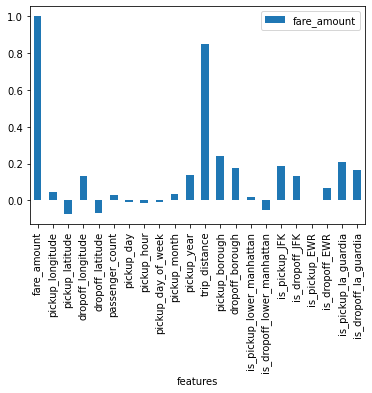

In [ ]:
ax = spearman_correlation.plot.bar(x='features', y='fare_amount', rot=90)

In [ ]:
print(train_df.columns)

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_day', 'pickup_hour', 'pickup_day_of_week', 'pickup_month',
       'pickup_year', 'trip_distance', 'pickup_borough', 'dropoff_borough',
       'is_pickup_lower_manhattan', 'is_dropoff_lower_manhattan',
       'is_pickup_JFK', 'is_dropoff_JFK', 'is_pickup_EWR', 'is_dropoff_EWR',
       'is_pickup_la_guardia', 'is_dropoff_la_guardia'],
      dtype='object')


In [ ]:
train_df = train_df.drop(['is_pickup_EWR', 'pickup_day', 'pickup_day_of_week', 'pickup_month'],axis=1)

##Splitting dataset into Train and Test sets

In [ ]:
X=train_df.drop(['fare_amount'],axis=1)
y=train_df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

##Custom Implementation of Decision Tree Regressor

---



In [ ]:
# Importing basic libraries
import numpy as np
import pandas as pd

# Class for constructing decision tree node
class TreeNode():
    def __init__(self, 
                 idxFeature=None, 
                 variance_reduction=None, 
                 threshold_value=None, 
                 tree_left=None, 
                 tree_right=None,                 
                 leafNode_value=None):
        self.idxFeature = idxFeature        
        self.variance_reduction = variance_reduction
        self.threshold_value = threshold_value
        self.tree_left = tree_left
        self.tree_right = tree_right
        self.leafNode_value = leafNode_value

In [ ]:
class Decision_Tree_Regressor():
    def __init__(self, 
                 min_samples_split=2, 
                 max_depth=2):
        self.root = None
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth        
    
    # This function helps determine leaf node value by computing mean. 
    def compute_leaf_value(self, Y):        
        mean_value = np.mean(Y)
        return mean_value  

    # This function helps split data based on threshold value.
    def split(self, 
              dataframe, 
              idxFeature, 
              threshold_value):        
        dataframe_tree_left = np.array([dr for dr in dataframe 
                                        if dr[idxFeature]<=threshold_value])
        dataframe_tree_right = np.array([dr for dr in dataframe 
                                         if dr[idxFeature]>threshold_value])
        
        return dataframe_tree_left, dataframe_tree_right
    
     # This function helps calculate variance reduction of a Node.
    def variance_reduction(self, 
                           parent_Node, 
                           leftChild_Node, 
                           rightChild_Node):
        nParentNode = len(parent_Node)
        nleft = len(leftChild_Node) / nParentNode
        nright = len(rightChild_Node) / nParentNode

        weighted_vreduc_left_right = (nleft * np.var(leftChild_Node) + 
                                   nright * np.var(rightChild_Node))
        vreduction_value = np.var(parent_Node) - weighted_vreduc_left_right

        return vreduction_value

    # This function recursively builds the tree on basis of best splitting criterion.    
    def construct_tree(self, 
                       dataframe, 
                       currentDepth=0):
        data_X = dataframe[:,:-1]
        data_Y = dataframe[:,-1]

        split_criterion_best = {}

        nSamples, nFeatures = np.shape(X)

        # split until stopping conditions are met
        if nSamples >= self.min_samples_split and currentDepth <= self.max_depth:
            # find the best split
            split_criterion_best = self.get_split_criterion_best(dataframe, nSamples, nFeatures)
            # check if information gain is positive
            if "variance_reduction" in split_criterion_best and split_criterion_best["variance_reduction"]>0:
                # recursively call left and right sub tree
                tree_left_subtree = self.construct_tree(split_criterion_best["dataframe_tree_left"], currentDepth+1)
                tree_right_subtree = self.construct_tree(split_criterion_best["dataframe_tree_right"], currentDepth+1)
                # return decision node
                return TreeNode(idxFeature = split_criterion_best["idxFeature"], 
                                variance_reduction = split_criterion_best["variance_reduction"],
                                threshold_value = split_criterion_best["threshold_value"], 
                                tree_left = tree_left_subtree, 
                                tree_right = tree_right_subtree)
        
        # compute leaf node
        leaf_value = self.compute_leaf_value(data_Y)
        # return leaf node
        return TreeNode(leafNode_value=leaf_value)
    
    # This function helps find the best splitting node.
    def get_split_criterion_best(self, 
                                 dataframe, 
                                 nSamples, 
                                 nFeatures):
              
        # Maintain a dictionary to store the best split
        split_criterion_best = {}

        # To keep track of max variance for a feature.
        max_variance_reduction = -float("inf")

        # loop over all the features
        for idxFeature in range(nFeatures):
            feature_values = dataframe[:, idxFeature]
            possible_threshold_values = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold_value in possible_threshold_values:
                # get current split
                dataframe_tree_left, dataframe_tree_right = self.split(dataframe, idxFeature, threshold_value)
                # check if childs are not null
                if len(dataframe_tree_left)>0 and len(dataframe_tree_right)>0:
                    parent_y = dataframe[:, -1]
                    tree_left_y = dataframe_tree_left[:, -1]
                    tree_right_y = dataframe_tree_right[:, -1]
                    # compute information gain
                    cur_variance_reduction = self.variance_reduction(parent_y, tree_left_y, tree_right_y)
                    # update the best split only if max variance reduction is less than new value .i.e good split
                    if cur_variance_reduction > max_variance_reduction: 
                        # Update max variance reduction
                        max_variance_reduction = cur_variance_reduction     
                        # Update corresponding values.
                        split_criterion_best["variance_reduction"] = cur_variance_reduction
                        split_criterion_best["threshold_value"] = threshold_value
                        split_criterion_best["idxFeature"] = idxFeature            
                        split_criterion_best["dataframe_tree_left"] = dataframe_tree_left
                        split_criterion_best["dataframe_tree_right"] = dataframe_tree_right

        # return best split
        return split_criterion_best  

    # Function to train the decision tree.
    def fit(self, 
            X, 
            Y):
        dataframe = np.concatenate((X, Y), axis=1)
        self.root = self.construct_tree(dataframe)

    # Predict Function
    def predict(self, 
                X):
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions  

    # Helper function for Predict funtion to determine the new data value.    
    def make_prediction(self, 
                        xNode, 
                        decisionTree):
              
        if decisionTree.leafNode_value!=None: 
          return decisionTree.leafNode_value

        feature_val = xNode[decisionTree.idxFeature]
        if feature_val <= decisionTree.threshold_value:
            return self.make_prediction(xNode, decisionTree.tree_left)
        else:
            return self.make_prediction(xNode, decisionTree.tree_right)   
    

In [ ]:
TreeRegressor = Decision_Tree_Regressor(min_samples_split = 3, max_depth = 3)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
TreeRegressor.fit(X_train,y_train)

In [ ]:
X_test = X_test.values

In [ ]:
Y_pred = TreeRegressor.predict(X_test) 

TreeRegressor_r2 = r2_score(Y_pred, y_test)
print("R2 for Custom Decision Tree is ",TreeRegressor_r2)

TreeRegressor_RMSE = np.sqrt(mean_squared_error(Y_pred, y_test))
print("RMSE for Custom Decision Tree is ",TreeRegressor_RMSE)

R2 for Custom Decision Tree is  0.67382374510272
RMSE for Custom Decision Tree is  4.752681021870103


##SKLEARN Implementation of Decision Tree Regressor

---



In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
SkLearn_TreeRegressor = DecisionTreeRegressor(min_samples_split = 3, max_depth = 3)
SkLearn_TreeRegressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_split=3)

In [ ]:
SkLearn_Y_pred = SkLearn_TreeRegressor.predict(X_test) 

SkLearn_TreeRegressor_r2 = r2_score(SkLearn_Y_pred, y_test)
print("R2 for SKlearn Decision Tree is ", SkLearn_TreeRegressor_r2)

SkLearn_TreeRegressor_RMSE = np.sqrt(mean_squared_error(SkLearn_Y_pred, y_test))
print("RMSE for SKlearn Decision Tree is ", SkLearn_TreeRegressor_RMSE)

R2 for SKlearn Decision Tree is  0.6078414592209112
RMSE for SKlearn Decision Tree is  5.079722005575151


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"



##Custom Implementation of Random Forest Regressor

---



In [ ]:
#Helper functions for custom random forest regressor

# Bootstraping helps divide the data for trees construction
def bootstrap_sample(X, 
                     y):
    nSamples_data = X.shape[0] 
    indices = np.random.choice(nSamples_data,nSamples_data, replace=True)
    return X[indices], y[indices]
    
# This function helps determine leaf node value by computing mean.
def combined_average_label(y):
    mean_val = np.mean(y)
    return mean_val;

In [ ]:
class Random_Forest_Regressor:
    def __init__(self, 
                 n_trees=10, 
                 min_samples_split=2, 
                 max_depth=100):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.trees = []
 
    # Fits data into model and trains our random forest model.
    def fit(self, 
            X, 
            y):
        # holds collection of trees.
        self.trees = []
        # Build n trees by splitting the data with replacement using bootstrapping.
        for _ in range(self.n_trees):
            decisionTree = Decision_Tree_Regressor(min_samples_split = self.min_samples_split,
                                                   max_depth = self.max_depth)
            X_samp, y_samp = bootstrap_sample(X, y)
            # Fit the bootstrapped data into the custom decision tree.
            decisionTree.fit(X_samp, y_samp)
            self.trees.append(decisionTree)

    # Predict funtion determines the new data value by taking the mean of all the results from n decision trees.
    def predict(self, 
                X):
        decisionTree_predictions = np.array([decisionTree.predict(X) for decisionTree in self.trees])
        decisionTree_predictions = np.swapaxes(decisionTree_predictions, 0, 1)
        y_predictions = [combined_average_label(decisiontree_pred) for decisiontree_pred in decisionTree_predictions]
        return np.array(y_predictions)

In [ ]:
ForestRegressor = Random_Forest_Regressor(n_trees = 10, min_samples_split = 2, max_depth = 100)
X_train_values = X_train.values
ForestRegressor.fit(X_train_values, y_train)

In [ ]:
Y_pred = ForestRegressor.predict(X_test) 

ForestRegressor_r2 = r2_score(Y_pred, y_test)
print("R2 for Custom Random Forest regression model is ", ForestRegressor_r2)

ForestRegressor_RMSE = np.sqrt(mean_squared_error(Y_pred, y_test))
print("RMSE for Custom Random Forest regression model is ", ForestRegressor_RMSE)

R2 for Custom Random Forest regression model is  0.6777709922784986
RMSE for Custom Random Forest regression model is  5.207655728431738


##SKLEARN Implementation of Random Forest Regressor

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
SkLearn_ForestRegressor =  RandomForestRegressor(n_estimators = 10, min_samples_split = 2, max_depth = 100)
SkLearn_ForestRegressor.fit(X_train_values, y_train.ravel())

RandomForestRegressor(max_depth=100, n_estimators=10)

In [ ]:
SkLearn_Y_pred = SkLearn_ForestRegressor.predict(X_test) 

SkLearn_ForestRegressor_r2 = r2_score(SkLearn_Y_pred, y_test)
print("R2 for SKlearn Random Forest regression model is ", SkLearn_ForestRegressor_r2)

SkLearn_ForestRegressor_RMSE = np.sqrt(mean_squared_error(SkLearn_Y_pred, y_test))
print("RMSE for SKlearn Random Forest regression model is ", SkLearn_ForestRegressor_RMSE)

R2 for SKlearn Random Forest regression model is  0.7558678053209729
RMSE for SKlearn Random Forest regression model is  4.425487183586003
